### Visualización movilidad Madrid por zonas

In [1]:
# cargar datos

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('PredBrMur08.csv')
df['FDIA']=pd.to_datetime(df['FDIA'])
df.set_index('FDIA',inplace=True)
df.head()


,ID
FDIA,
2021-05-01,9896
2021-05-02,9573
2021-05-03,8732
2021-05-04,16446
2021-05-05,15812


In [4]:
len(df)

123

In [5]:
# visualizamos los datos de previsión
dfreal = df.iloc[:92]
dfprev = df.iloc[92:]

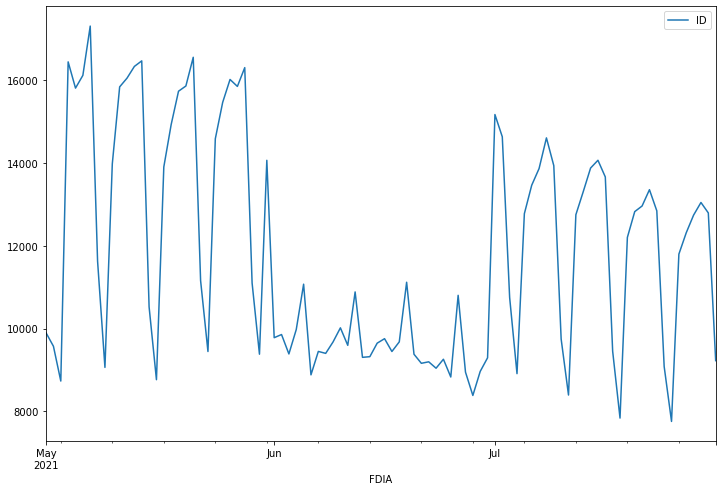

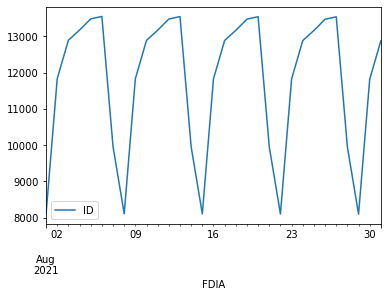

In [6]:
dfreal.plot(legend=True,label='Real',figsize=(12,8))
dfprev.plot(legend=True,label='Previsión')

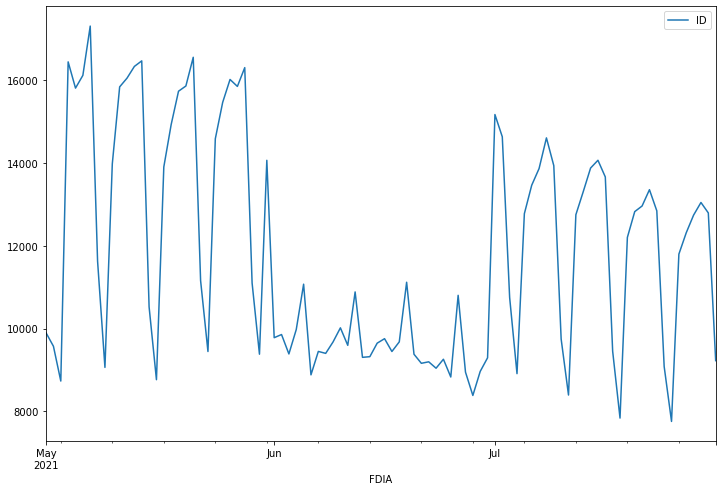

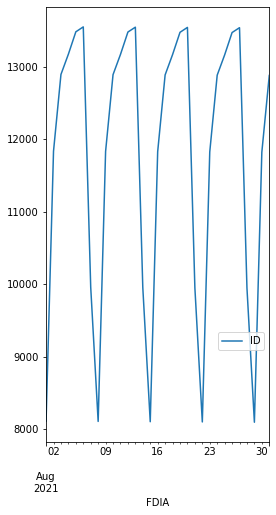

In [7]:
ax1 = dfreal.plot(legend=True,label='Real',figsize=(12,8))
ax2 = dfprev.plot(legend=True,label='Previsión',figsize=(4,8))
ax2.autoscale(axis='x',tight=True)
ax2.legend(loc=4, bbox_to_anchor=(1.0,0.2));

In [8]:
def descripcionDatosDataset(datos):
    print("Cantidad de filas:", datos.shape[0])
    print("Cantidad de columnas:", datos.shape[1])
    print('-'*100)
    for columna in datos.columns:
        valoresDescripcion = ''
        tipo = ''
        if datos[columna].dtype == 'float64' or datos[columna].dtype == 'int64':
            tipo = 'numérico'
            valoresDescripcion = datos[columna].agg(['min', 'max', 'mean', 'std', 'median'])
        else:
            tipo = 'nominal' #categórico | string | no-numérico
            valoresDescripcion = {'valoresPresentes' : datos[columna].unique(), 
                                  'cantidadNulos' : datos[columna].isna().sum()}
                                 #'conteoValores' : pd.value_counts(datos[columna])}
        print('Columna: ' + columna)
        print('Tipo de datos: ' + tipo)
        print('Descripción de valores:')
        if tipo == 'numérico':
            print(valoresDescripcion)
        else:
            print('-- Valores presentes (10 primeros): ' + str(valoresDescripcion['valoresPresentes'][:10]))
            pctNulos = (valoresDescripcion['cantidadNulos'] / datos.shape[0]) * 100
            print('-- Cantidad de nulos: ' + str(valoresDescripcion['cantidadNulos']) + ' = ' + "{0:.2f}".format(pctNulos) + '%')
        print('-'*100)

In [9]:
datos = dfreal
descripcionDatosDataset(datos)

Cantidad de filas: 92
Cantidad de columnas: 1
----------------------------------------------------------------------------------------------------
Columna: ID
Tipo de datos: numérico
Descripción de valores:
min        7756.000000
max       17311.000000
mean      11789.684783
std        2712.117209
median    11086.500000
Name: ID, dtype: float64
----------------------------------------------------------------------------------------------------


In [10]:
datos = dfprev
descripcionDatosDataset(datos)

Cantidad de filas: 31
Cantidad de columnas: 1
----------------------------------------------------------------------------------------------------
Columna: ID
Tipo de datos: numérico
Descripción de valores:
min        8095.000000
max       13549.000000
mean      11762.451613
std        1989.581461
median    12883.000000
Name: ID, dtype: float64
----------------------------------------------------------------------------------------------------


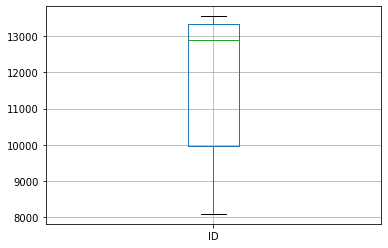

In [11]:
agosto = df.iloc[92:]
boxplot = agosto.boxplot(column=['ID'])